In [12]:
# important packages
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

#### Reading the data into dataframe

In [18]:
import pandas as pd
from io import StringIO

# Load the data from the attachment string

# Read the CSV data into a DataFrame
# Use only rows with data (non-empty rows)
df = pd.read_csv('dataframe.csv')
# Remove rows where all stock price columns are NaN
price_columns = [col for col in df.columns if any(keyword in col for keyword in ['open', 'close', 'high', 'low'])]
df = df.dropna(subset=price_columns, how='all')
df.head()

,Tick,$CARD open,$CARD close,$CARD high,$CARD low,$CARD volume,$CARD index,$CARD mid,$LOGN open,$LOGN close,...,$GARR volume,$GARR index,$GARR mid,$SIMP open,$SIMP close,$SIMP high,$SIMP low,$SIMP volume,$SIMP index,$SIMP mid
2,352086,100612.0,100668.0,100871.0,100532.0,0.0,351.0,100647.0,98838.0,98826.0,...,0.0,351.0,98880.0,98428.0,98482.0,98681.0,98350.0,0.0,351.0,98462.0
12,353085,100682.0,100577.0,100744.0,100522.0,0.0,352.0,100647.0,98759.0,98838.0,...,0.0,352.0,98938.0,98369.0,98267.0,98430.0,98213.0,0.0,352.0,98335.0
22,354086,100791.0,100713.0,100940.0,100119.0,0.0,353.0,100777.0,98751.0,98777.0,...,0.0,353.0,98854.0,98476.0,98399.0,98621.0,97819.0,0.0,353.0,98462.0
32,355086,100184.0,100298.0,100609.0,100163.0,0.0,354.0,100258.0,98634.0,98728.0,...,0.0,354.0,98878.0,98375.0,98262.0,98429.0,97991.0,0.0,354.0,98335.0
42,356086,100655.0,100605.0,100717.0,100539.0,0.0,355.0,100647.0,98788.0,98784.0,...,0.0,355.0,98883.0,98216.0,98167.0,98277.0,98103.0,0.0,355.0,98208.0


## Volatility 
Now let's calculate simple volatility

In [19]:
stocks = ['$CARD', '$LOGN', '$HEST', '$JUMP', '$GARR', '$SIMP']
volatility_data = {}

average_volatility = {}
for stock in stocks:
    high_col = f'{stock} high'
    low_col = f'{stock} low'
    open_col = f'{stock} open'
    valid_rows = df[(df[high_col] > 0) & (df[low_col] > 0) & (df[open_col] > 0)]
    if not valid_rows.empty:
        volatility = (valid_rows[high_col] - valid_rows[low_col]) / valid_rows[open_col]
        average_volatility[stock] = volatility.mean()
    else:
        average_volatility[stock] = None

average_volatility

{'$CARD': np.float64(0.0030697813018771497),
 '$LOGN': np.float64(0.0030997668863839774),
 '$HEST': np.float64(0.003069698210523867),
 '$JUMP': np.float64(0.0030697890354723983),
 '$GARR': np.float64(0.003069840300171993),
 '$SIMP': np.float64(0.0030699382572555137)}

## Volatility 2
Let's calculate realized volatility

In [20]:
price_columns = [col for col in df.columns if 'open' in col or 'close' in col]
df_clean = df.dropna(subset=price_columns, how='all')

# Calculate daily returns for each stock based on close prices
returns = {}
for stock in ['$CARD', '$LOGN', '$HEST', '$JUMP', '$GARR', '$SIMP']:
    close_col = f'{stock} close'
    df_clean[close_col] = pd.to_numeric(df_clean[close_col], errors='coerce')
    returns[stock] = df_clean[close_col].pct_change()

# Calculate realized volatility as annualized standard deviation of daily returns
# Assuming 252 trading days in a year
realized_vol = {}
for stock in returns:
    realized_vol[stock] = np.sqrt(252) * returns[stock].std()

realized_vol

{'$CARD': np.float64(0.07565356199814255),
 '$LOGN': np.float64(0.02280581735423578),
 '$HEST': np.float64(0.02093347468100897),
 '$JUMP': np.float64(0.023317224222142753),
 '$GARR': np.float64(0.019133007985581665),
 '$SIMP': np.float64(0.022322180267468232)}

Some info about dataframe

In [21]:
df.describe()

,Tick,$CARD open,$CARD close,$CARD high,$CARD low,$CARD volume,$CARD index,$CARD mid,$LOGN open,$LOGN close,...,$GARR volume,$GARR index,$GARR mid,$SIMP open,$SIMP close,$SIMP high,$SIMP low,$SIMP volume,$SIMP index,$SIMP mid
count,9.920000e+02,992.000000,992.000000,992.000000,992.000000,992.0,992.000000,992.000000,992.000000,992.000000,...,992.0,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.0,992.000000,992.000000
mean,8.475870e+05,100052.213710,100053.109879,100224.068548,99916.980847,0.0,846.500000,100070.637097,97721.510081,97724.332661,...,0.0,846.500000,98886.871976,103621.657258,103622.105847,103800.438508,103482.388105,0.0,846.500000,103640.472782
std,2.865100e+05,1441.924241,1437.736044,1440.828323,1439.755086,0.0,286.510035,1438.921774,1657.596315,1657.065674,...,0.0,286.510035,836.616495,2881.125055,2875.361138,2882.363363,2875.298253,0.0,286.510035,2878.952612
min,3.520860e+05,96518.000000,96459.000000,96644.000000,96232.000000,0.0,351.000000,96574.000000,94378.000000,94442.000000,...,0.0,351.000000,97231.000000,97729.000000,97797.000000,97856.000000,97675.000000,0.0,351.000000,97829.000000
25%,5.998472e+05,98998.750000,99040.750000,99203.750000,98892.250000,0.0,598.750000,99100.000000,96149.750000,96117.750000,...,0.0,598.750000,98195.500000,101559.250000,101558.750000,101706.500000,101417.750000,0.0,598.750000,101561.000000
50%,8.475860e+05,100010.000000,100014.000000,100168.000000,99895.500000,0.0,846.500000,100000.000000,98404.500000,98395.500000,...,0.0,846.500000,99001.000000,104319.500000,104342.500000,104491.500000,104181.000000,0.0,846.500000,104352.000000
75%,1.095345e+06,101056.250000,101040.500000,101219.250000,100906.750000,0.0,1094.250000,101038.000000,98883.750000,98884.250000,...,0.0,1094.250000,99540.250000,105636.000000,105690.000000,105879.750000,105536.750000,0.0,1094.250000,105708.000000
max,1.343086e+06,104328.000000,104354.000000,104396.000000,104312.000000,0.0,1342.000000,104352.000000,100813.000000,100800.000000,...,0.0,1342.000000,100460.000000,108067.000000,108013.000000,108514.000000,107909.000000,0.0,1342.000000,108053.000000


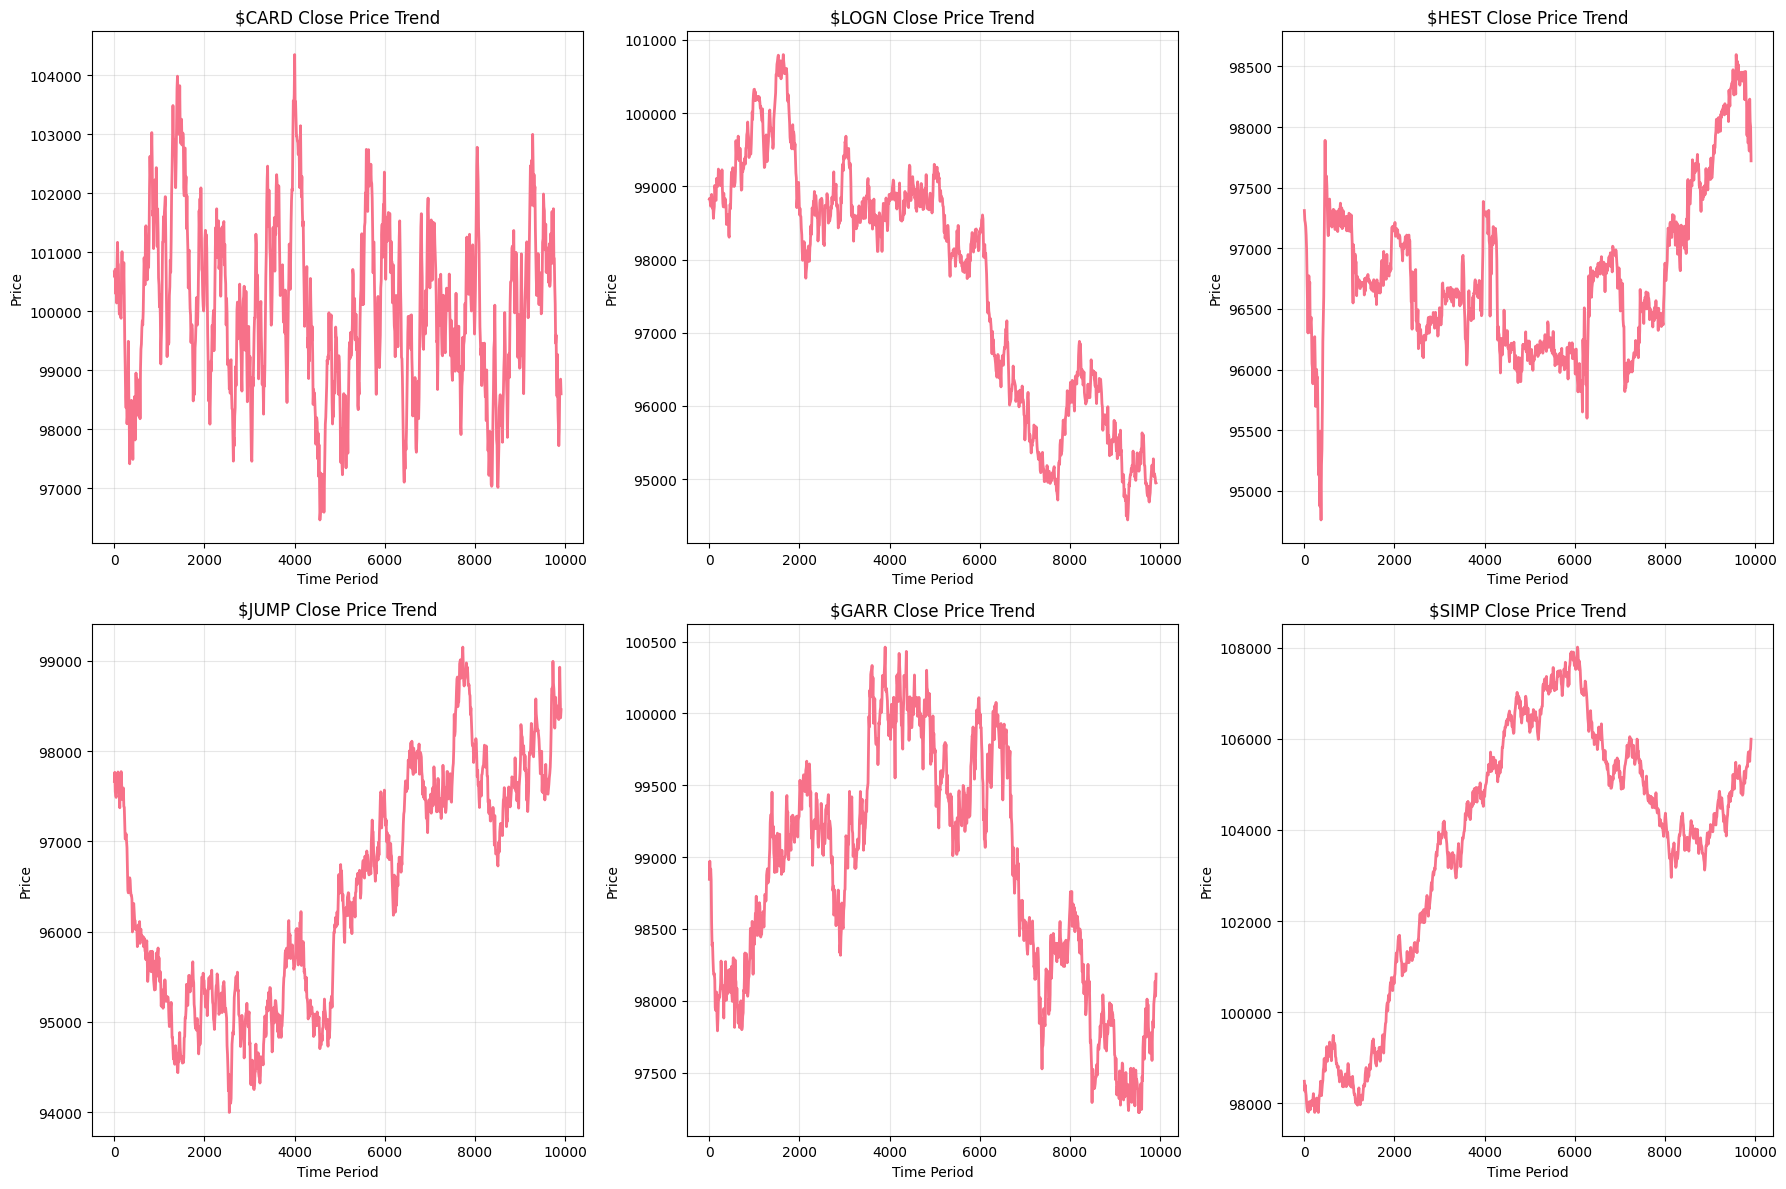

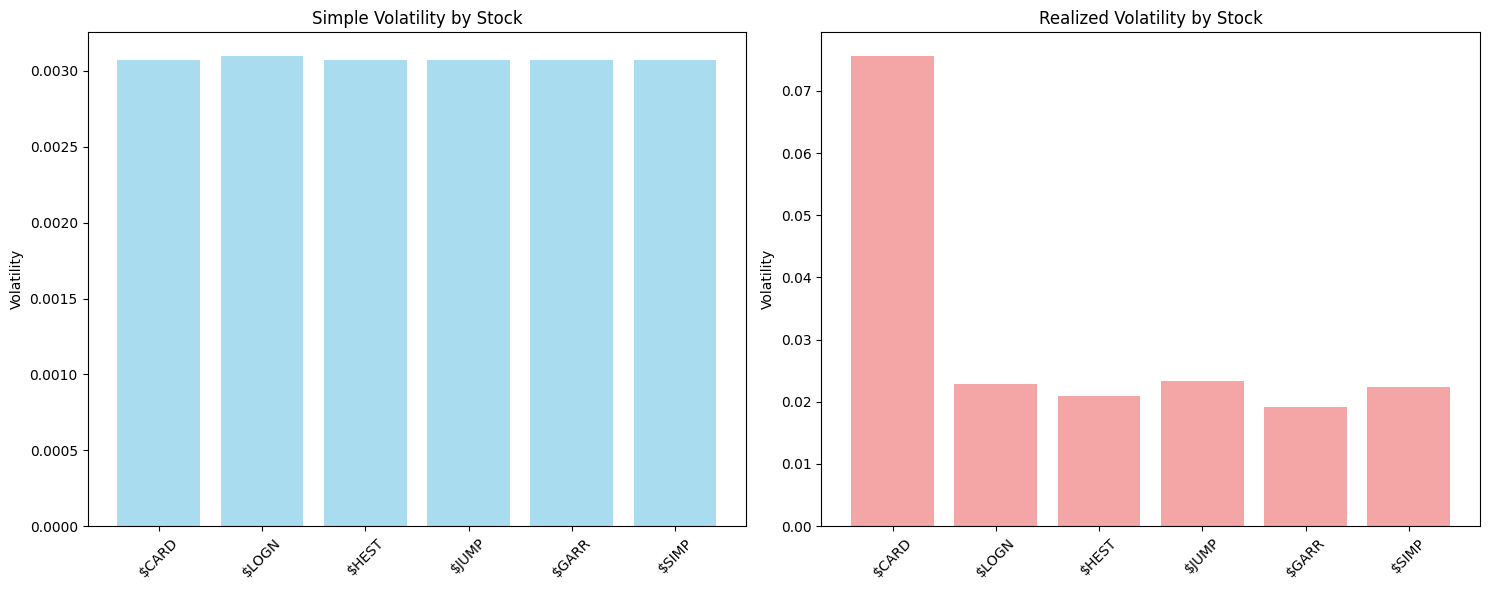

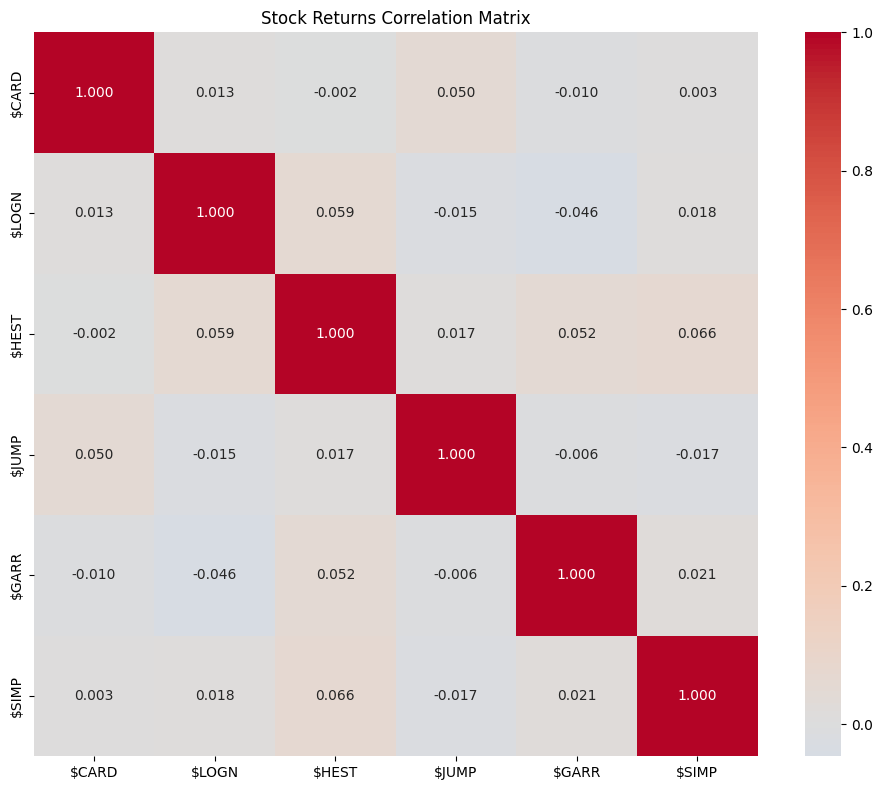

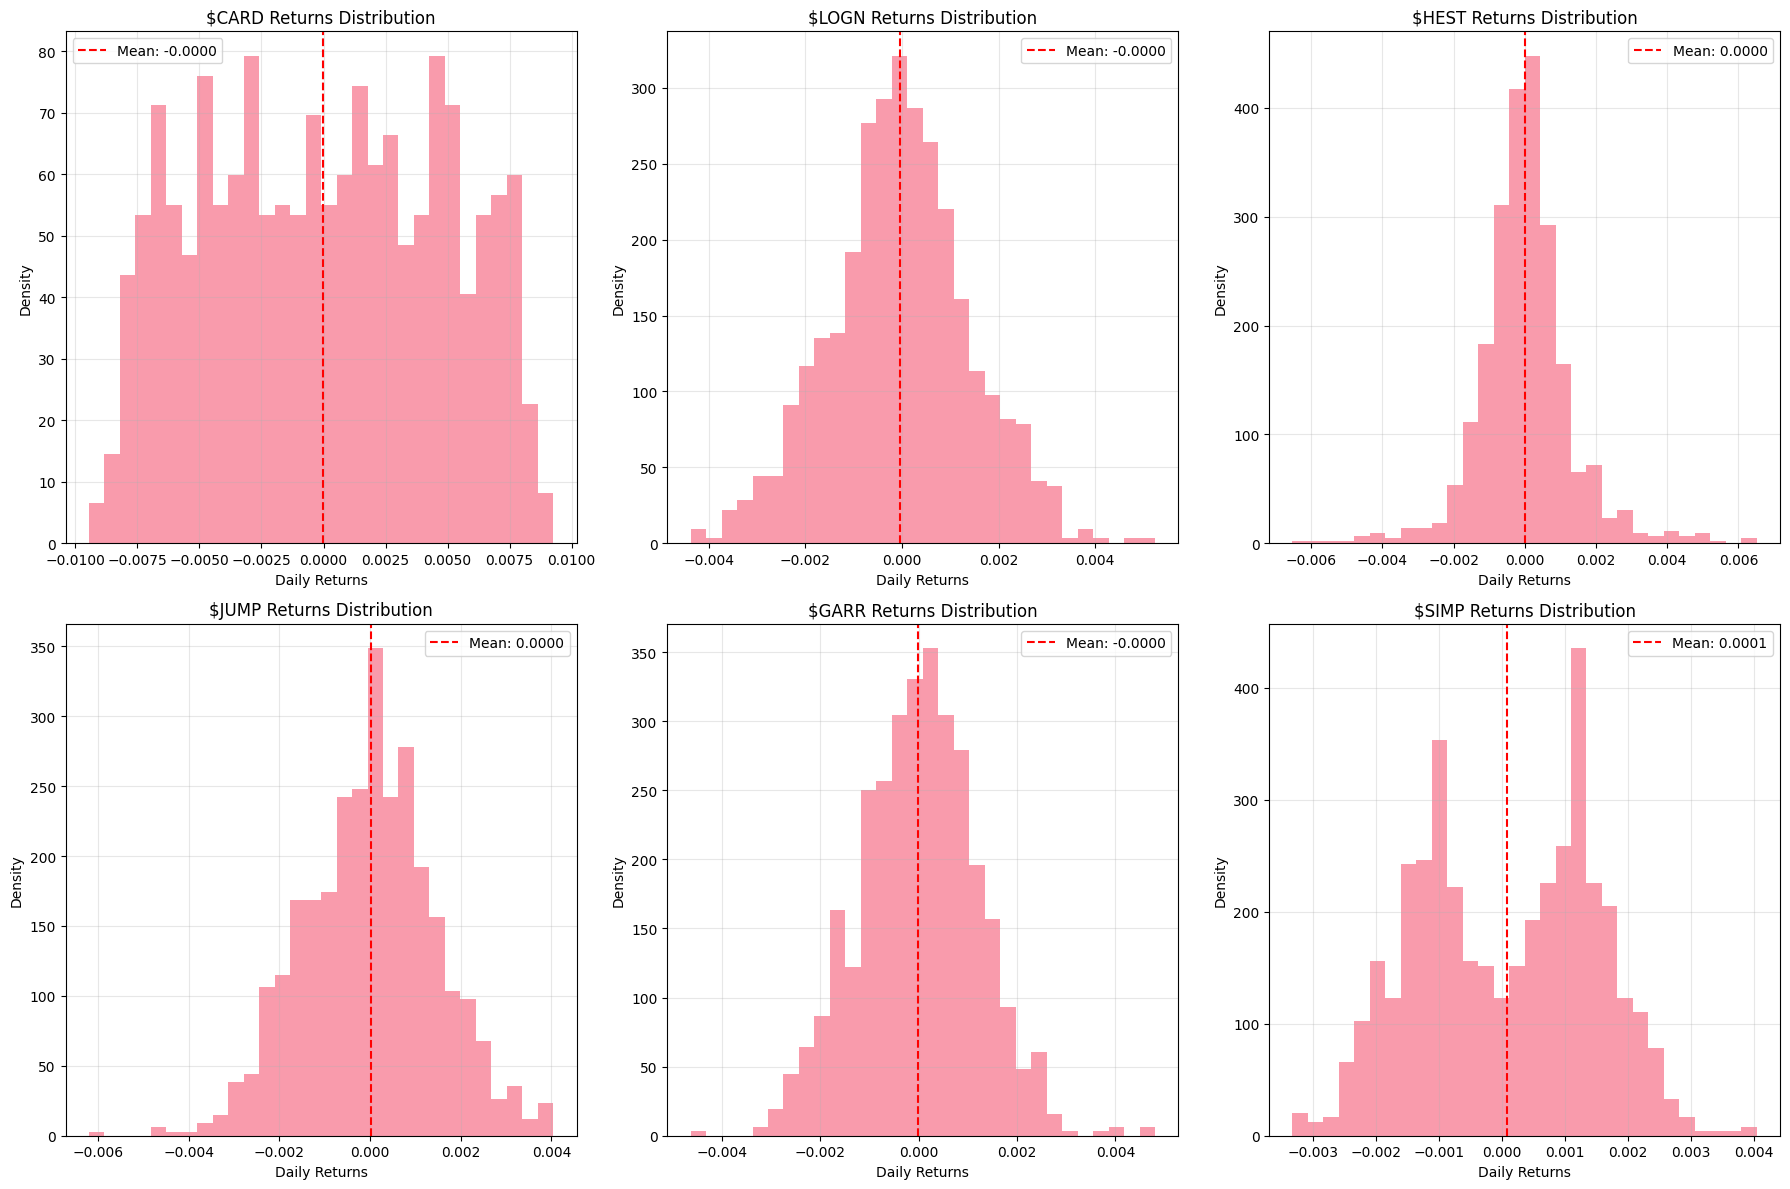

ML Features Summary:
       $CARD_price_range  $CARD_daily_return  $CARD_volatility_5d  \
count         992.000000          991.000000           987.000000   
mean            0.003070           -0.000010             0.004583   
std             0.001606            0.004766             0.001266   
min             0.000373           -0.009456             0.000963   
25%             0.001881           -0.004055             0.003686   
50%             0.002811            0.000020             0.004708   
75%             0.003925            0.004163             0.005500   
max             0.010652            0.009260             0.008033   

       $CARD_volatility_10d  $CARD_price_momentum  $LOGN_price_range  \
count            982.000000            987.000000         992.000000   
mean               0.004746             -0.000045           0.003100   
std                0.000719              0.010815           0.001557   
min                0.002242             -0.027848           0.000421 

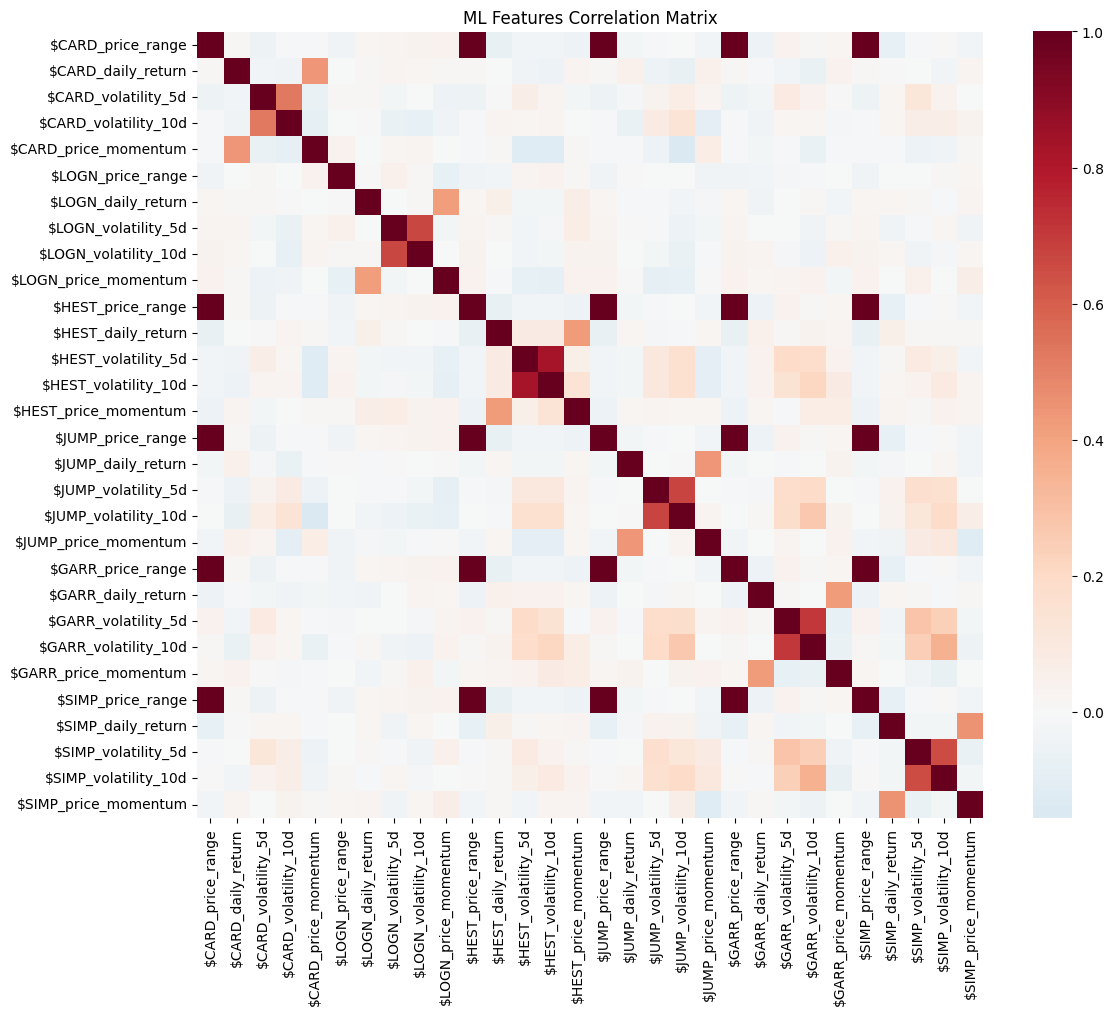


Dataset shape for ML: (992, 30)
Features available: ['$CARD_price_range', '$CARD_daily_return', '$CARD_volatility_5d', '$CARD_volatility_10d', '$CARD_price_momentum', '$LOGN_price_range', '$LOGN_daily_return', '$LOGN_volatility_5d', '$LOGN_volatility_10d', '$LOGN_price_momentum', '$HEST_price_range', '$HEST_daily_return', '$HEST_volatility_5d', '$HEST_volatility_10d', '$HEST_price_momentum', '$JUMP_price_range', '$JUMP_daily_return', '$JUMP_volatility_5d', '$JUMP_volatility_10d', '$JUMP_price_momentum', '$GARR_price_range', '$GARR_daily_return', '$GARR_volatility_5d', '$GARR_volatility_10d', '$GARR_price_momentum', '$SIMP_price_range', '$SIMP_daily_return', '$SIMP_volatility_5d', '$SIMP_volatility_10d', '$SIMP_price_momentum']


In [22]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Plot price trends for all stocks
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, stock in enumerate(stocks):
    close_col = f'{stock} close'
    df_plot = df[df[close_col] > 0].copy()
    df_plot[close_col] = pd.to_numeric(df_plot[close_col], errors='coerce')
    
    axes[i].plot(df_plot.index, df_plot[close_col], linewidth=2)
    axes[i].set_title(f'{stock} Close Price Trend')
    axes[i].set_xlabel('Time Period')
    axes[i].set_ylabel('Price')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Volatility comparison
vol_df = pd.DataFrame({
    'Stock': stocks,
    'Simple_Volatility': [average_volatility[stock] for stock in stocks],
    'Realized_Volatility': [realized_vol[stock] for stock in stocks]
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Simple volatility
ax1.bar(vol_df['Stock'], vol_df['Simple_Volatility'], color='skyblue', alpha=0.7)
ax1.set_title('Simple Volatility by Stock')
ax1.set_ylabel('Volatility')
ax1.tick_params(axis='x', rotation=45)

# Realized volatility
ax2.bar(vol_df['Stock'], vol_df['Realized_Volatility'], color='lightcoral', alpha=0.7)
ax2.set_title('Realized Volatility by Stock')
ax2.set_ylabel('Volatility')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Correlation matrix of returns
returns_df = pd.DataFrame(returns).dropna()
correlation_matrix = returns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Stock Returns Correlation Matrix')
plt.tight_layout()
plt.show()

# 4. Distribution of returns for each stock
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, stock in enumerate(stocks):
    returns_clean = returns[stock].dropna()
    axes[i].hist(returns_clean, bins=30, alpha=0.7, density=True)
    axes[i].axvline(returns_clean.mean(), color='red', linestyle='--', 
                   label=f'Mean: {returns_clean.mean():.4f}')
    axes[i].set_title(f'{stock} Returns Distribution')
    axes[i].set_xlabel('Daily Returns')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Create features for ML model
ml_features = pd.DataFrame()

for stock in stocks:
    # Price features
    high_col = f'{stock} high'
    low_col = f'{stock} low'
    open_col = f'{stock} open'
    close_col = f'{stock} close'
    
    # Clean and convert to numeric
    for col in [high_col, low_col, open_col, close_col]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate technical indicators
    ml_features[f'{stock}_price_range'] = (df[high_col] - df[low_col]) / df[open_col]
    ml_features[f'{stock}_daily_return'] = returns[stock]
    ml_features[f'{stock}_volatility_5d'] = returns[stock].rolling(5).std()
    ml_features[f'{stock}_volatility_10d'] = returns[stock].rolling(10).std()
    ml_features[f'{stock}_price_momentum'] = df[close_col].pct_change(5)

# Display feature statistics
print("ML Features Summary:")
print(ml_features.describe())

# 6. Feature correlation for ML
plt.figure(figsize=(12, 10))
feature_corr = ml_features.corr()
sns.heatmap(feature_corr, cmap='RdBu_r', center=0, square=True, fmt='.2f')
plt.title('ML Features Correlation Matrix')
plt.tight_layout()
plt.show()

print(f"\nDataset shape for ML: {ml_features.shape}")
print(f"Features available: {list(ml_features.columns)}")

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def load_and_prepare_data():
    # Load all CSV files
    underlying = pd.read_csv('dataframe.csv')
    tradeable = pd.read_csv('tradeable_instruments.csv')
    orderbook = pd.read_csv('orderbook_data.csv')
    trades = pd.read_csv('trade_events.csv')
    
    return underlying, tradeable, orderbook, trades

def create_features(tradeable_df, orderbook_df, trades_df):
    # Merge datasets on timestamp and instrument
    features = tradeable_df.copy()
    
    # Add orderbook features (latest for each instrument/timestamp)
    orderbook_agg = orderbook_df.groupby(['timestamp', 'instrument_id']).agg({
        'spread': 'first',
        'mid_price': 'first', 
        'bid_ask_ratio': 'first',
        'depth_imbalance': 'first'
    }).reset_index()
    
    features = features.merge(orderbook_agg, on=['timestamp', 'instrument_id'], how='left')
    
    # Add trade features (volume, frequency in last N seconds)
    trade_agg = trades_df.groupby(['timestamp', 'instrument_id']).agg({
        'quantity': 'sum',
        'price': ['mean', 'std', 'count']
    }).reset_index()
    
    trade_agg.columns = ['timestamp', 'instrument_id', 'trade_volume', 'avg_trade_price', 'price_volatility', 'trade_count']
    features = features.merge(trade_agg, on=['timestamp', 'instrument_id'], how='left')
    
    # Fill NaN values
    features = features.fillna(0)
    
    return features

def train_price_prediction_model(features_df):
    # Predict next period's close price
    features_df = features_df.sort_values(['instrument_id', 'timestamp'])
    features_df['next_close'] = features_df.groupby('instrument_id')['close'].shift(-1)
    features_df = features_df.dropna(subset=['next_close'])
    
    # Feature engineering
    feature_cols = ['open', 'high', 'low', 'volume', 'underlying_price', 
                   'time_to_expiry', 'moneyness', 'spread', 'mid_price',
                   'bid_ask_ratio', 'depth_imbalance', 'trade_volume', 
                   'avg_trade_price', 'price_volatility', 'trade_count']
    
    # Encode categorical variables
    le_instrument = LabelEncoder()
    le_type = LabelEncoder()
    features_df['instrument_encoded'] = le_instrument.fit_transform(features_df['instrument_id'])
    features_df['type_encoded'] = le_type.fit_transform(features_df['instrument_type'])
    
    feature_cols.extend(['instrument_encoded', 'type_encoded'])
    
    X = features_df[feature_cols]
    y = features_df['next_close']
    
    # Train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)
    
    # Feature importance
    importance_df = pd.DataFrame({
        'feature': feature_cols,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("Feature Importance:")
    print(importance_df.head(10))
    
    score = rf.score(X_test, y_test)
    print(f"Model R² Score: {score:.4f}")
    
    return rf, le_instrument, le_type

def train_direction_prediction_model(features_df):
    # Predict price direction (up/down)
    features_df = features_df.sort_values(['instrument_id', 'timestamp'])
    features_df['price_change'] = features_df.groupby('instrument_id')['close'].pct_change().shift(-1)
    features_df['direction'] = (features_df['price_change'] > 0).astype(int)
    features_df = features_df.dropna(subset=['direction'])
    
    feature_cols = ['open', 'high', 'low', 'volume', 'underlying_price', 
                   'time_to_expiry', 'moneyness', 'spread', 'mid_price',
                   'bid_ask_ratio', 'depth_imbalance', 'trade_volume', 
                   'avg_trade_price', 'price_volatility', 'trade_count']
    
    # Encode categorical variables
    le_instrument = LabelEncoder()
    le_type = LabelEncoder()
    features_df['instrument_encoded'] = le_instrument.fit_transform(features_df['instrument_id'])
    features_df['type_encoded'] = le_type.fit_transform(features_df['instrument_type'])
    
    feature_cols.extend(['instrument_encoded', 'type_encoded'])
    
    X = features_df[feature_cols]
    y = features_df['direction']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)
    
    accuracy = rf.score(X_test, y_test)
    print(f"Direction Prediction Accuracy: {accuracy:.4f}")
    
    return rf

if __name__ == "__main__":
    # Load data
    underlying, tradeable, orderbook, trades = load_and_prepare_data()
    
    # Create features
    features = create_features(tradeable, orderbook, trades)
    
    # Train models
    price_model, le_instrument, le_type = train_price_prediction_model(features)
    direction_model = train_direction_prediction_model(features)
    
    print("Models trained successfully!")

Feature Importance:
               feature  importance
16        type_encoded    0.877034
5       time_to_expiry    0.028627
7               spread    0.023622
8            mid_price    0.016972
15  instrument_encoded    0.013624
9        bid_ask_ratio    0.008547
2                  low    0.007733
3               volume    0.006469
10     depth_imbalance    0.005997
0                 open    0.005741
Model R² Score: 0.5030
Direction Prediction Accuracy: 0.7312
Models trained successfully!
